<a href="https://colab.research.google.com/github/DyingTwice/MS/blob/main/MS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Enhancing the Bike Sharing System

Welcome to **Lab 4** of the Modeling & Simulation course! In this laboratory session, we will build upon the foundations laid in the previous labs to enhance our bike-sharing system simulation. This lab introduces the concept of **time slot-specific probabilities**, allowing you to model varying bike usage patterns throughout the day. Additionally, you will implement bike maintenance and downtime, develop a rebalancing mechanism, track customer satisfaction, and undertake a **graded assignment** to design and implement a comprehensive simulation project.

---

## Table of Contents

1. [Recap of Previous Labs](#recap)
2. [Introduction to Time Slot-Specific Probabilities](#time-slots)
   - [Understanding Time Slots](#understanding-time-slots)
3. [Implementing Time Slot-Specific Probabilities](#implementing-time-slots)
   - [Defining Time Slots](#defining-time-slots)
4. [Graded Assignment Overview](#assignment)

---

## <a name="recap"></a>1. Recap of Previous Labs

### Lab 1: Python Introduction
- Gained proficiency in Python programming.
- Learned fundamental programming concepts such as variables, data types, control structures, functions, and basic I/O operations.

### Lab 2: Basic Bike Sharing System Modeling
- Developed a simplified bike-sharing system using Python classes.
- Modeled entities such as stations, bikes, and trips.
- Implemented basic trip generation and analyzed system behavior over a short period.

### Lab 3: Introduction to SimPy
- Introduced SimPy, a discrete-event simulation library in Python.
- Reimplemented the bike-sharing system using SimPy constructs like environments, processes, and resources.
- Explored extensions including variable trip durations, rebalancing strategies, and customer satisfaction tracking.

---

## <a name="time-slots"></a>2. Introduction to Time Slot-Specific Probabilities

In real-world scenarios, bike usage varies throughout the day. To simulate this variability, we introduce **time slot-specific probabilities**. This enhancement allows the simulation to reflect different demand levels during various periods, such as morning rush hours and midday.

### <a name="understanding-time-slots"></a>Understanding Time Slots

- **Time Slots:** Defined periods within a day where bike trip probabilities differ.
- **Recurring Pattern:** Time slots repeat every simulated day, enabling multi-day simulations.
- **Example Time Slots:**
  - **Morning Start (0-120 minutes):** Initial hours with increasing demand.
  - **Midday (120-720 minutes):** Peak hours with stable high demand.

### <a name="mapping-time"></a>Mapping Simulation Time to Real-Time

To create realistic simulations, map simulation minutes to actual day times.

- **Simulation Start Time:** 6:00 AM
- **Morning Start:** 6:00 AM - 8:00 AM (0-120 minutes)
- **Midday:** 8:00 AM - 6:00 PM (120-720 minutes)
- **Simulation Duration:** 20 days (12 hours/day) → 14400 minutes

---

## <a name="implementing-time-slots"></a>3. Implementing Time Slot-Specific Probabilities

### <a name="defining-time-slots"></a>Defining Time Slots

Define time slots with specific trip probability matrices within a single day. Use the modulo operation to map the current simulation time to the appropriate time slot.

```python
# Define time slots for a single day
time_slots = [
    {
        'name': 'morning_start',
        'start': 0,       # 0 minutes into the day (6:00 AM)
        'end': 120,       # 2 hours
        'prob_matrix': {
            ('A', 'B'): 0.4,
            ('B', 'A'): 0.6,
            ('A', 'C'): 0.2,
            ('C', 'A'): 0.5,
            ('B', 'C'): 0.3,
            ('C', 'B'): 0.4,
            ('A', 'D'): 0.3,
            ('D', 'A'): 0.2,
        }
    },
    {
        'name': 'midday',
        'start': 120,      # 2 hours into the day (8:00 AM)
        'end': 720,        # 12 hours total (6:00 PM)
        'prob_matrix': {
            ('A', 'B'): 0.2,
            ('B', 'A'): 0.3,
            ('A', 'C'): 0.1,
            ('C', 'A'): 0.2,
            ('B', 'C'): 0.25,
            ('C', 'B'): 0.35,
            ('A', 'D'): 0.15,
            ('D', 'A'): 0.25,
        }
    }
    # Add more time slots if needed
]

# Define default probability matrix if no slot matches
default_prob_matrix = {
    ('A', 'B'): 0.05,
    ('B', 'A'): 0.05,
    ('A', 'C'): 0.05,
    ('C', 'A'): 0.05,
    ('B', 'C'): 0.05,
    ('C', 'B'): 0.05,
    ('A', 'D'): 0.05,
    ('D', 'A'): 0.05,
}


In [37]:
# Start from the code you've implemented in lab 3, add time-slot specific probabilities below


## <a name="assignment"></a>Graded Assignment Overview

Design and implement an enhanced bike-sharing system simulation using **SimPy**, incorporating advanced features to model a realistic and complex environment. Your simulation should build upon the concepts learned in previous labs and include the following components:

---

Your simulation must include the following elements:

### 1. Multiple Stations:

- **Minimum of Four stations** with varying capacities and initial bike counts.
- Each station should have a unique name, capacity, and initial number of bikes.

### 2. Time-Dependent Trip Probabilities:

- Implement trip probabilities that change based on different time slots (e.g., morning start, midday).
- Define at least **two distinct time slots** with different probability matrices.
- Ensure that time slots are **recurring daily** over the simulation period.

### 3. Bike Maintenance and Downtime:

- Model bike failures with a specified failure probability during trips.
- Implement a repair process that handles broken bikes, making them unavailable until repaired. The implementation details are up to your imagination.
- Track and report the number of bikes under maintenance.

### 4. Rebalancing Mechanism:

- Develop a rebalancing strategy to redistribute bikes between stations based on current demand and bike levels.
- Rebalancing should occur at regular intervals (e.g., every 20 minutes) and follow defined criteria.

### 5. Customer Satisfaction Tracking:

- Track the number of **unhappy customers** who cannot rent a bike due to unavailability.
- Track the number of **unhappy customers** who cannot return a bike due to full stations.

### 6. Data Collection and Visualization:

- Collect data on **bike levels** at each station over time.
- Collect data on **broken bikes** and maintenance activities.
- Collect data on **customer satisfaction** metrics.
- Generate plots to visualize:
  - **Bike levels** at each station over time.
  - **Number of bikes under maintenance**.
  - **Customer satisfaction metrics** (e.g., unhappy customers over time).

### 7. Simulation:

- Allow the simulation to run for a configurable duration (e.g., **20 days**).
- Parameters such as the number of stations, capacities, initial bikes, trip probabilities, maintenance rates, rebalancing intervals, and simulation duration should be easily adjustable.
- Simulate and observe the system with various parameters.

---

#### (Optional) Money Earning Mechanism:

- Introduce a system where the bike-sharing service earns **money based on bike rentals** (e.g., per hour rented).
- Track and report **total earnings** over the simulation period.

## What to Look For in Your Simulations

The primary objective of this lab is to enable you to create a realistic and dynamic simulation of a bike-sharing system that accounts for daily usage patterns, system maintenance, and operational strategies. Things to look for:

* Bike Availability: Assess how well the rebalancing mechanism maintains adequate bike levels across stations.
* Maintenance Impact: Evaluate the effect of bike failures on system performance and customer satisfaction.
* Customer Satisfaction: Analyze the number of unhappy customers and identify patterns or causes.

Write down a couple of observations from your simulations to accompany the presentation of your system.

## Grading

You will present your work in the upcoming laboratory, showing your system implementation and 1-3 simulations that you ran. The simulations should be accompanied by visual plots and you are encouraged to present any interesting observations about your system (e.g. with environment setup X the customer dissatisfaction drops significantly when increasing the rebalancing frequency to value y).

The project grade will be determined by the grade of completion of your system (how much of the project task has been implemented), as well as your understanding of it. The latter will be assessed through some basic questions about your model/system/simulations.

*Note: Where not strongly specified, you are free to design a subsystem/idea however you find best fit, e.g. points 2, 3 and 4 can have many different subsystem designs. There is no one correct way to do it.

In [38]:
!pip install simpy

In [39]:
import simpy
import random
import matplotlib.pyplot as plt

# The Environment in SimPy manages the simulation time and handles event scheduling. It acts as the central controller of the simulation.
env = simpy.Environment()

# Processes are functions that yield events. They simulate the behavior of active components in the system, like customers, machines, or in our case, bikes and trips.
# Example of a simple process
def simple_process(env):
    while True:
        print(f"Time {env.now}: Process is running")
        yield env.timeout(1)  # Wait for 1 time unit


# To start a process in SimPy, you add it to the environment:
env.process(simple_process(env))

<Process(simple_process) object at 0x7a7b7b76dc00>

In [40]:
# Defining the Station Class
import simpy
import random

class Station:
    def __init__(self, env, name, capacity, init_bikes):
        self.env = env
        self.name = name
        self.capacity = capacity
        self.bikes = simpy.Container(env, init=init_bikes, capacity=capacity)

    def available_space(self):
        """Returns the number of available spaces at the station."""
        return self.capacity - self.bikes.level

    def return_bike(self):
        """Returns a repaired bike to the station."""
        if self.bikes.level < self.capacity:
            yield self.bikes.put(1)  # Put the bike back into the station's container
            print(f"Time {self.env.now}: Repaired bike returned to {self.name}. Bikes at station: {self.bikes.level}")
        else:
            print(f"Time {self.env.now}: {self.name} is full. Cannot return repaired bike.")

In [41]:
from os import stat
# Create stations
UPT_station = Station(env, "UPT", capacity=10, init_bikes=5)
UVT_station = Station(env, "UVT", capacity=15, init_bikes=8)
CENTER_station= Station(env, "CENTER", capacity=12, init_bikes=6)
PARK_station = Station(env, "PARK", capacity=8, init_bikes=0)

stations = [UPT_station, UVT_station, CENTER_station, PARK_station]

In [42]:
class Maintenance:
    def __init__(self):
        self.repaired_bikes = []
        self.rebalance_interval = 60  # Rebalance every 60 minutes
        self.unhappy_customers_rent = 0  # Count of unhappy customers who cannot rent bikes
        self.unhappy_customers_full_station = 0  # Count of unhappy customers who cannot return bikes

    def repair_bike(self, bike):
        """Simulate bike repair and add it to the repaired bikes list."""
        self.repaired_bikes.append(bike)

    def return_repaired_bikes(self):
        """Return repaired bikes to stations with available space."""
        for bike in self.repaired_bikes:
            for station in stations:
                if station.available_space() > 0:
                    env.process(station.return_bike())  # Return bike to the station
                    break  # Move on to the next bike after successfully returning
            else:
                print(f"Time {env.now}: No available space for bike {bike}.")  # No space found for this bike

        # Clear the repaired bikes list after returning
        self.repaired_bikes.clear()

    def rebalance(self):
        """Rebalance bikes among stations every defined interval."""
        while True:
            yield env.timeout(self.rebalance_interval)
            print(f"Time {env.now}: Rebalancing bikes...")

            # Calculate average bikes across all stations
            total_bikes = sum(station.bikes.level for station in stations)
            average_bikes = total_bikes // len(stations)  # Use integer division

            for station in stations:
                if station.bikes.level > average_bikes:  # This station has excess bikes
                    excess_bikes = station.bikes.level - average_bikes
                    print(f"{station.name} has {excess_bikes} excess bikes.")

                    # Move excess bikes to stations that need them
                    for other_station in stations:
                        if other_station != station and other_station.available_space() > 0:
                            bikes_to_move = min(excess_bikes, other_station.available_space())
                            station.bikes.get(bikes_to_move)  # Remove bikes from the current station
                            other_station.bikes.put(bikes_to_move)  # Add bikes to the other station
                            print(f"Moved {bikes_to_move} bikes from {station.name} to {other_station.name}.")
                            excess_bikes -= bikes_to_move
                            if excess_bikes <= 0:
                                break

# Initialize maintenance
maintenance = Maintenance()

bike_failure_probability = 0.50  # 50% chance of a bike breaking down during a trip

In [43]:
# Define time slots for a single day
# Define trip probabilities
time_slots = [
    {
        'name': 'morning_start',
        'start': 0,       # 0 minutes into the day (6:00 AM)
        'end': 120,       # 2 hours
        'prob_matrix': {
            ('UPT', 'UVT'): 0.4,
            ('UVT', 'UPT'): 0.6,
            ('UPT', 'CENTER'): 0.2,
            ('CENTER', 'UPT'): 0.5,
            ('UVT', 'CENTER'): 0.3,
            ('CENTER', 'UVT'): 0.4,
            ('UPT', 'PARK'): 0.3,
            ('PARK', 'UPT'): 0.2,
        }
    },
    {
        'name': 'midday',
        'start': 120,      # 2 hours into the day (8:00 AM) = 120 minutes
        'end': 720,        # 12 hours total (6:00 PM)
        'prob_matrix': {
            ('UPT', 'UVT'): 0.2,
            ('UVT', 'UPT'): 0.3,
            ('UPT', 'CENTER'): 0.1,
            ('CENTER', 'UPT'): 0.2,
            ('UVT', 'CENTER'): 0.25,
            ('CENTER', 'UVT'): 0.35,
            ('UPT', 'PARK'): 0.15,
            ('PARK', 'UPT'): 0.25,
        }
    }
]

# Define a default probability matrix for times that don't match any time slot
default_prob_matrix = {
    ('UPT', 'UVT'): 0.05,
    ('UVT', 'UPT'): 0.05,
    ('UPT', 'CENTER'): 0.05,
    ('CENTER', 'UPT'): 0.05,
    ('UVT', 'CENTER'): 0.05,
    ('CENTER', 'UVT'): 0.05,
    ('UPT', 'PARK'): 0.05,
    ('PARK', 'UPT'): 0.05,
}


In [44]:
# Function to get the probability matrix based on current time
def get_prob_matrix(current_time):
    for slot in time_slots:
        if slot['start'] <= current_time < slot['end']:
            return slot['prob_matrix']
    return default_prob_matrix

# Function to generate a trip
def generate_trip(env, stations, maintenance):
    while True:
        current_time = env.now % 1440
        prob_matrix = get_prob_matrix(current_time)

        trips = list(prob_matrix.keys())
        probabilities = list(prob_matrix.values())
        trip = random.choices(trips, probabilities)[0]

        origin, destination = trip
        print(f"Time {env.now}: Trip from {origin} to {destination}")

        # Check if there are bikes available to rent
        if stations[next(i for i, station in enumerate(stations) if station.name == origin)].available_space() == 0:
            print(f"Time {env.now}: Customer unhappy. No bikes available at {origin}.")
            maintenance.unhappy_customers_rent += 1  # Increment unhappy customer counter

        if random.random() < bike_failure_probability:
            print(f"Time {env.now}: Bike broke down on the trip from {origin} to {destination}")
            maintenance.repair_bike("Bike")  # Repair the broken bike

        trip_duration = random.randint(10, 20)
        yield env.timeout(trip_duration)

# Start the trip generation process
env.process(generate_trip(env, stations, maintenance))

# Start the rebalancing process
env.process(maintenance.rebalance())

# Run the simulation for 24 hours (1440 minutes)
env.run(until=1440)

# Print out customer satisfaction statistics
print(f"\nUnhappy customers who could not rent a bike: {maintenance.unhappy_customers_rent}")
print(f"Unhappy customers who could not return a bike due to full stations: {maintenance.unhappy_customers_full_station}")

Time 0: Process is running
Time 0: Trip from CENTER to UPT
Time 0: Bike broke down on the trip from CENTER to UPT
Time 1: Process is running
Time 2: Process is running
Time 3: Process is running
Time 4: Process is running
Time 5: Process is running
Time 6: Process is running
Time 7: Process is running
Time 8: Process is running
Time 9: Process is running
Time 10: Process is running
Time 11: Process is running
Time 12: Process is running
Time 13: Process is running
Time 14: Process is running
Time 15: Process is running
Time 16: Process is running
Time 17: Trip from UPT to UVT
Time 17: Bike broke down on the trip from UPT to UVT
Time 17: Process is running
Time 18: Process is running
Time 19: Process is running
Time 20: Process is running
Time 21: Process is running
Time 22: Process is running
Time 23: Process is running
Time 24: Process is running
Time 25: Process is running
Time 26: Process is running
Time 27: Process is running
Time 28: Process is running
Time 29: Trip from UPT to PA

Time 0: Bike rented from UVT. Bikes left: 7
Time 0: Bike broke down on the trip from UVT to UPT
Time 18: UPT is full. Cannot return bike.
Time 18: Bike rented from UPT. Bikes left: 9
Time 18: Bike broke down on the trip from UPT to UVT
Time 20: Rebalancing bikes...
Moved 4 bikes from UPT to UVT.
Moved 5 bikes from UVT to UPT.
Moved 1 bikes from UVT to CENTER.
Moved 2 bikes from CENTER to UVT.
Time 37: Bike returned to UVT. Bikes at station: 8
Time 37: Bike rented from CENTER. Bikes left: 4
Time 40: Rebalancing bikes...
Moved 5 bikes from UPT to UVT.
Moved 5 bikes from UVT to UPT.
Moved 3 bikes from UVT to CENTER.
Moved 2 bikes from CENTER to UVT.
Time 56: UPT is full. Cannot return bike.
Time 56: Bike rented from UVT. Bikes left: 6
Time 56: Bike broke down on the trip from UVT to UPT
Time 60: Rebalancing bikes...
Moved 5 bikes from UPT to UVT.
Moved 5 bikes from UVT to UPT.
Moved 1 bikes from UVT to CENTER.
Moved 1 bikes from CENTER to UVT.
Time 75: UPT is full. Cannot return bike.
Tim

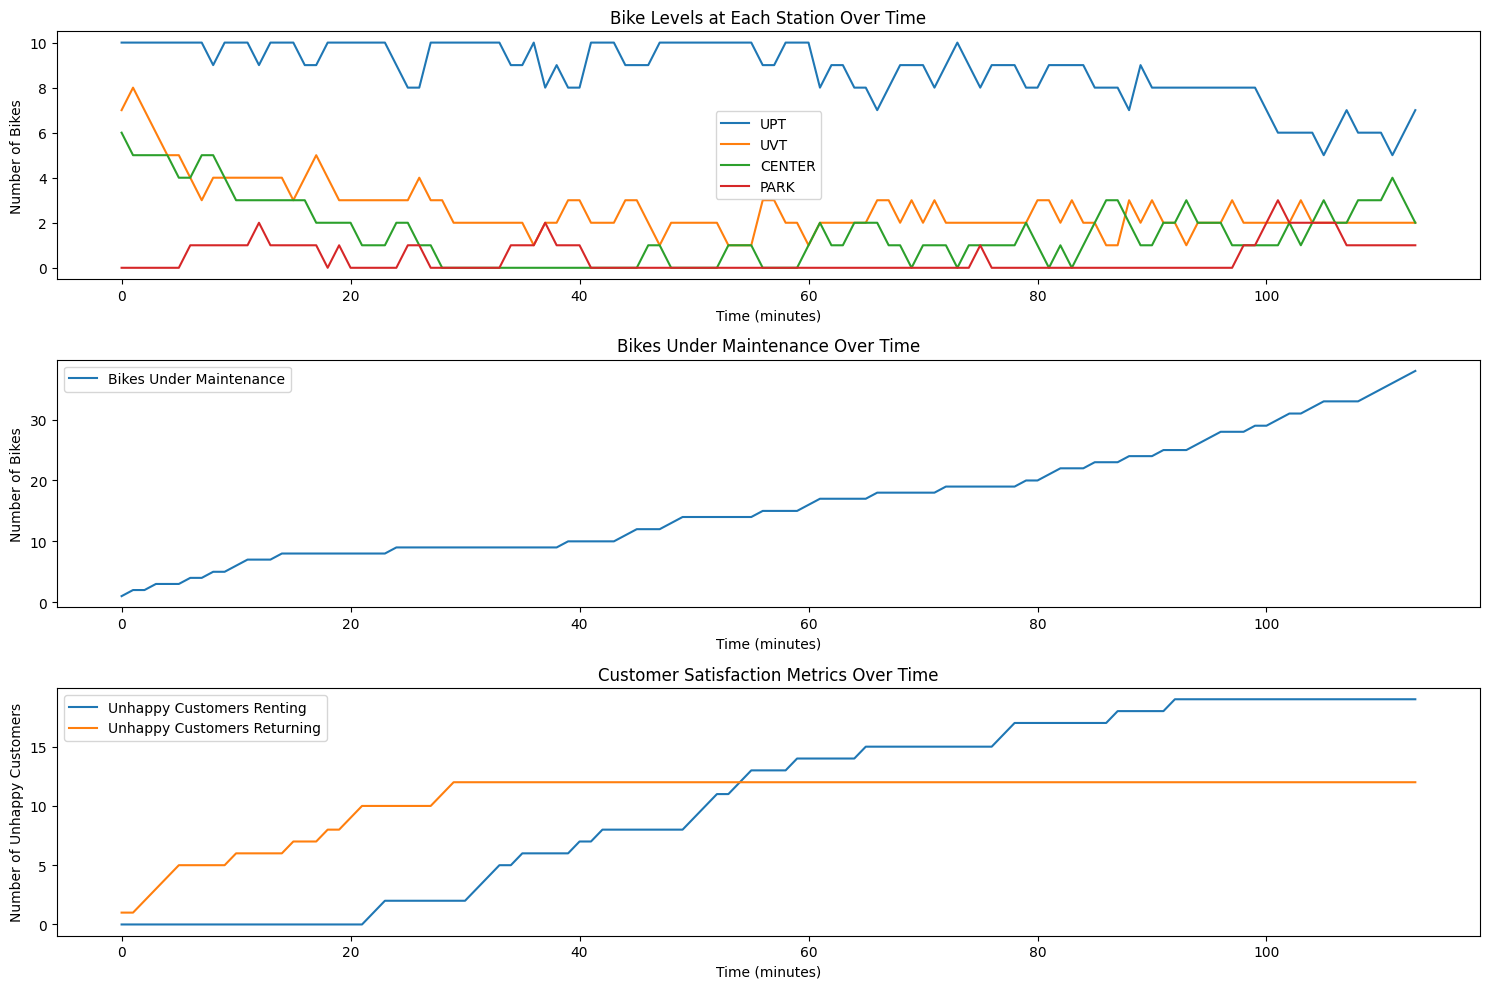

In [45]:
import simpy
import random
import matplotlib.pyplot as plt

# The Environment in SimPy manages the simulation time and handles event scheduling.
env = simpy.Environment()

# Defining the Station Class
class Station:
    def __init__(self, env, name, capacity, init_bikes):
        self.env = env
        self.name = name
        self.capacity = capacity
        self.bikes = simpy.Container(env, init=init_bikes, capacity=capacity)

    def available_space(self):
        """Returns the number of available spaces at the station."""
        return self.capacity - self.bikes.level

    def rent_bike(self):
        """Rent a bike from the station, if available."""
        if self.bikes.level > 0:
            yield self.bikes.get(1)
            print(f"Time {self.env.now}: Bike rented from {self.name}. Bikes left: {self.bikes.level}")
        else:
            print(f"Time {self.env.now}: No bikes available to rent at {self.name}.")
            maintenance.unhappy_customers_rent += 1  # Increment unhappy customer counter

    def return_bike(self):
        """Return a bike to the station, if there is space."""
        if self.bikes.level < self.capacity:
            yield self.bikes.put(1)
            print(f"Time {self.env.now}: Bike returned to {self.name}. Bikes at station: {self.bikes.level}")
        else:
            print(f"Time {self.env.now}: {self.name} is full. Cannot return bike.")
            maintenance.unhappy_customers_full_station += 1  # Increment unhappy customer counter

# Create stations
UPT_station = Station(env, "UPT", capacity=10, init_bikes=10)
UVT_station = Station(env, "UVT", capacity=15, init_bikes=8)
CENTER_station = Station(env, "CENTER", capacity=12, init_bikes=6)
PARK_station = Station(env, "PARK", capacity=8, init_bikes=0)

stations = [UPT_station, UVT_station, CENTER_station, PARK_station]

# Defining the Maintenance class
class Maintenance:
    def __init__(self):
        self.repaired_bikes = []
        self.rebalance_interval = 30  # Rebalance every 30 minutes
        self.unhappy_customers_rent = 0  # Count of unhappy customers who cannot rent bikes
        self.unhappy_customers_full_station = 0  # Count of unhappy customers who cannot return bikes
        self.bikes_under_maintenance = 0  # Count of bikes currently under maintenance

    def repair_bike(self, bike):
        """Simulate bike repair and add it to the repaired bikes list."""
        self.repaired_bikes.append(bike) # Adds a bike to the list self.repaired_bikes
        self.bikes_under_maintenance += 1  # Increment maintenance count

    def return_repaired_bikes(self):
        """Return repaired bikes to stations with available space."""
        for bike in self.repaired_bikes:
            for station in stations:
                if station.available_space() > 0:
                    env.process(station.return_bike())  # Return bike to the station
                    break
            else:
                print(f"Time {env.now}: No available space for bike {bike}.")  # No space found for this bike

        self.repaired_bikes.clear()
        self.bikes_under_maintenance = 0  # Reset maintenance count after returning

    def rebalance(self):
        """Rebalance bikes among stations every defined interval."""
        while True:
            yield env.timeout(self.rebalance_interval) # Causes the simulation to wait or "pause" for a specific period, defined by self.rebalance_interval, before continuing to the next step in the rebalance method
            print(f"Time {env.now}: Rebalancing bikes...")

            # Calculate average bikes across all stations
            total_bikes = sum(station.bikes.level for station in stations) # Sums the total bikes available in each station
            average_bikes = total_bikes // len(stations)  # Use integer division

            for station in stations:
                if station.bikes.level > average_bikes:
                    excess_bikes = station.bikes.level - average_bikes
                    for other_station in stations:
                        if other_station != station and other_station.available_space() > 0:
                            bikes_to_move = min(excess_bikes, other_station.available_space())
                            station.bikes.get(bikes_to_move)
                            other_station.bikes.put(bikes_to_move)
                            print(f"Moved {bikes_to_move} bikes from {station.name} to {other_station.name}.")
                            excess_bikes -= bikes_to_move
                            if excess_bikes <= 0:
                                break

# Initialize maintenance
maintenance = Maintenance()

bike_failure_probability = 0.50  # 50% chance of a bike breaking down during a trip

# Define time slots for a single day and trip probabilities
time_slots = [
    {
        'name': 'morning_start',
        'start': 0,
        'end': 120,
        'prob_matrix': {
            ('UPT', 'UVT'): 0.4,
            ('UVT', 'UPT'): 0.6,
            ('UPT', 'CENTER'): 0.2,
            ('CENTER', 'UPT'): 0.5,
            ('UVT', 'CENTER'): 0.3,
            ('CENTER', 'UVT'): 0.4,
            ('UPT', 'PARK'): 0.3,
            ('PARK', 'UPT'): 0.2,
        }
    },
    {
        'name': 'midday',
        'start': 120,
        'end': 720,
        'prob_matrix': {
            ('UPT', 'UVT'): 0.2,
            ('UVT', 'UPT'): 0.3,
            ('UPT', 'CENTER'): 0.1,
            ('CENTER', 'UPT'): 0.2,
            ('UVT', 'CENTER'): 0.25,
            ('CENTER', 'UVT'): 0.35,
            ('UPT', 'PARK'): 0.15,
            ('PARK', 'UPT'): 0.25,
        }
    }
]

default_prob_matrix = {
    ('UPT', 'UVT'): 0.05,
    ('UVT', 'UPT'): 0.05,
    ('UPT', 'CENTER'): 0.05,
    ('CENTER', 'UPT'): 0.05,
    ('UVT', 'CENTER'): 0.05,
    ('CENTER', 'UVT'): 0.05,
    ('UPT', 'PARK'): 0.05,
    ('PARK', 'UPT'): 0.05,
}

def get_prob_matrix(current_time):
    for slot in time_slots:
        if slot['start'] <= current_time < slot['end']:
            return slot['prob_matrix']
    return default_prob_matrix

bike_levels_data = {station.name: [] for station in stations}
maintenance_data = []
customer_satisfaction_data = {'rent_unhappy': [], 'return_unhappy': []}

def collect_data():
    for station in stations:
        bike_levels_data[station.name].append(station.bikes.level)
    maintenance_data.append(maintenance.bikes_under_maintenance)
    customer_satisfaction_data['rent_unhappy'].append(maintenance.unhappy_customers_rent)
    customer_satisfaction_data['return_unhappy'].append(maintenance.unhappy_customers_full_station)

def generate_trip(env, stations, maintenance):
    while True:
        current_time = env.now % 1440
        prob_matrix = get_prob_matrix(current_time)
        trips = list(prob_matrix.keys())
        probabilities = list(prob_matrix.values())
        trip = random.choices(trips, probabilities)[0]

        origin, destination = trip
        origin_station = next(station for station in stations if station.name == origin)
        destination_station = next(station for station in stations if station.name == destination)

        # Attempt to rent a bike
        if origin_station.bikes.level > 0:
            yield env.process(origin_station.rent_bike())

            # Simulate potential bike failure
            if random.random() < bike_failure_probability:
                print(f"Time {env.now}: Bike broke down on the trip from {origin} to {destination}")
                maintenance.repair_bike("Bike")

            trip_duration = random.randint(10, 20)
            yield env.timeout(trip_duration)

            # Attempt to return the bike to the destination station
            yield env.process(destination_station.return_bike())
        else:
            print(f"Time {env.now}: No bikes available to rent at {origin}")
            maintenance.unhappy_customers_rent += 1

        collect_data() # Record data at each time step in the simulation. It gathers information on the current state of the system, including the number of bikes at each station, the number of bikes currently under maintenance, and customer satisfaction metrics

env.process(generate_trip(env, stations, maintenance))
env.process(maintenance.rebalance())

env.run(until=1440)

print("\nFinal statistics:")
print("Bike levels at each station:")
for station in stations:
    print(f"{station.name}: {station.bikes.level}")

print(f"Unhappy customers due to unavailable bikes: {maintenance.unhappy_customers_rent}")
print(f"Unhappy customers due to full stations: {maintenance.unhappy_customers_full_station}")

plt.figure(figsize=(15, 10)) # Width 15, height 10
plt.subplot(3, 1, 1) # Row, column, index
for station_name, levels in bike_levels_data.items():
    plt.plot(levels, label=station_name)
plt.title('Bike Levels at Each Station Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Bikes')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(maintenance_data, label='Bikes Under Maintenance')
plt.title('Bikes Under Maintenance Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Bikes')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(customer_satisfaction_data['rent_unhappy'], label='Unhappy Customers Renting')
plt.plot(customer_satisfaction_data['return_unhappy'], label='Unhappy Customers Returning')
plt.title('Customer Satisfaction Metrics Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Unhappy Customers')
plt.legend()

plt.tight_layout()
plt.show()
